# 2024 Stack Overflow Developer Survey Analysis

The Stack Overflow Developer Survey is one of the largest annual surveys of developers worldwide.  
In this notebook, I’ll explore the **2024 results** to uncover insights into:

- Developer demographics
- Career trends (salaries, experience) 
- Popular programming languages, tools, and platforms   
- Industry implications for developers and employers  

**Objective:**  
To showcase end-to-end data analysis skills including data cleaning, visualization, and storytelling.  
This notebook is structured as a professional-style report suitable for Data Analyst & BI Analyst roles.

***

## 1.0 Data Loading & Amendments

### 1.1 Data & module import

We begin by importing the 2024 Stack Overflow Developer Survey dataset.  
Two CSVs are provided:
- `survey_results_public.csv`: main survey responses  
- `survey_results_schema.csv`: question schema 

the modules we will use for this will be:
- `pandas` - Data manipulation
- `Numpy` - Data arrays
- `matplotlib & seaborn` - Data visualization

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from collections import Counter

# Load data
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [78]:
schema.head(5)

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


### 1.1 Appending Data Frame

Looking at both the Data Frame and the Schema, i can see a couple of issues with how the indexes are structured and how the column names are labelled. 

Firstly, looking at the Data Frame, i can see we have a generated index and a `'ResponseId'` field, which is an index in itself. We will mitigate this by making the `'ResponseId'` the index column for this frame. For the schema, we will do the same with the `'qname'` field as they are both unique values.

Secondly, There are column names which have inconsistent labelling. the `'CompTotal'` field relates to the annual salary, whereas the `'ConvertedCompYearly'` is the annual salary, when converted to USD. For consistency, i will rename these to `'Salary'` and `'SalaryUSD'` respectively. 

In [79]:
# Amending index columns and renaming columns
df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')
schema = pd.read_csv('survey_results_schema.csv', index_col='qname')

df.rename(columns={'CompTotal': 'Salary'}, inplace=True)
df.rename(columns={'ConvertedCompYearly': 'SalaryUSD'}, inplace=True)

df

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,SalaryUSD,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,API document(s) and/or SDK document(s);AI-powe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
schema.sort_index(inplace=True)
schema

,qid,question,force_resp,type,selector
qname,,,,,
AIAcc,QID316,How much do you trust the accuracy of the outp...,False,MC,SAVR
AIBen,QID324,For the AI tools you use as part of your devel...,False,MC,MAVR
AIChallenges,QID346,What are the challenges to your company/whole ...,False,MC,MAVR
AIComplex,QID343,How well do the AI tools you use in your devel...,False,MC,SAVR
AIEthics,QID339,Which AI ethical responsibilities are most imp...,False,MC,MAVR
...,...,...,...,...,...
ToolsTech,QID275,Which <b>developer </b><strong>tools for compi...,False,Matrix,Likert
Webframe,QID264,Which <b>web frameworks and web technologies</...,False,Matrix,Likert
WorkExp,QID288,How many years of working experience do you have?,False,Slider,HSLIDER


### 1.2 Cleansing Data

Since this is a questionnaire, which carries the implication that duplicate data and missing fields are to be expected, its worth having a look at what the mandatory fields are within this data frame

In [81]:
# Sum of all null values, arranged in order
df.isnull().sum().sort_values(ascending=True)

MainBranch                        0
Age                               0
Employment                        0
Check                             0
AISelect                       4530
                              ...  
EmbeddedAdmired               48704
AINextMuch more integrated    51999
AINextNo change               52939
AINextLess integrated         63082
AINextMuch less integrated    64289
Length: 113, dtype: int64

We can see that the `MainBranch, Age, Employment & Check` field are all mandatory.

We can also see that the 'Check' field is just a check on the user, based on the schema question:

>Just checking to make sure you are paying attention to the survey questions. Select ‘Apples’ from the list and you can get back to the survey

This column is not required for our data frame, so i will go ahead and remove it completely. 

In [82]:
df.drop(columns='Check', inplace=True)

Due to the source of data being a questionnaire, we will ignore duplicate data as it is possible more than one person would give the same answers to the questions, but for knowledge purposes, we will see how many duplicated entries we have within this questionnaire;

In [83]:
df.duplicated().sum()

np.int64(487)

Lets take a look at the DataFrame information, using `df.info()` and `df.describe()`

In [84]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 112 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    MainBranch                      object 
 1    Age                             object 
 2    Employment                      object 
 3    RemoteWork                      object 
 4    CodingActivities                object 
 5    EdLevel                         object 
 6    LearnCode                       object 
 7    LearnCodeOnline                 object 
 8    TechDoc                         object 
 9    YearsCode                       object 
 10   YearsCodePro                    object 
 11   DevType                         object 
 12   OrgSize                         object 
 13   PurchaseInfluence               object 
 14   BuyNewTool                      object 
 15   BuildvsBuy                      object 
 16   TechEndorse                     object 
 17   Country        

In [85]:
df.describe()

,Salary,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SalaryUSD,JobSat
count,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


Two fields which look like they could cause some issues with the data analysis are the `'YearsCode'` and `'YearsCodePro'` fields. They are listed as objects, however you would expect only integers to be entered into this field. I suspect its to give the shorter or broader ranges that extend beyond the choices given, such as 'Less than .....' and 'More than .....' values. lets take a look:

In [86]:
df['YearsCode'].unique()

array([nan, '20', '37', '4', '9', '10', '7', '1', '15', '30', '31', '6',
       '12', '22', '5', '36', '25', '44', '24', '18', '3', '8',
       'More than 50 years', '11', '29', '40', '39', '2', '42', '34',
       '19', '35', '16', '33', '13', '23', '14', '28', '17', '21', '43',
       '46', '26', '32', '41', '45', '27', '38', '50', '48', '47',
       'Less than 1 year', '49'], dtype=object)

In [87]:
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

We're going to correct this by amending `'Less than 1 year'` to `'0'` and changing `'More than 50 years'` to `'51'`, which shouldn't disrupt the data output due to the small number of people who meet those criteria. Now we have all the values as numeric, we should be able to convert the field to numeric too.

In [ ]:
# Replacing the string values and converting values to integers
df.replace({'YearsCode': {'Less than 1 year': 0}}, inplace=True)
df.replace({'YearsCode': {'More than 50 years': 51}}, inplace=True)
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

df.replace({'YearsCodePro': {'Less than 1 year': 0}}, inplace=True)
df.replace({'YearsCodePro': {'More than 50 years': 51}}, inplace=True)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

While looking through the first 10 entries for the survey, we can see one of the country values as `'United Kingdom of Great Britain and Northern Ireland'`. to simplify this, we will just convert these answers to `'UK'`

In [89]:
df.replace({'Country': {'United Kingdom of Great Britain and Northern Ireland': 'UK'}}, inplace=True)

*** 

## 2.0 Developer Demographics

### 2.1 Country Distribution

The first demographic we will be looking at is the country distribution of where the questionnaire was filled out

In [90]:
# Number of participants in each country
df['Country'].value_counts()

Country
United States of America              11095
Germany                                4947
India                                  4231
UK                                     3224
Ukraine                                2672
                                      ...  
Micronesia, Federated States of...        1
Nauru                                     1
Chad                                      1
Djibouti                                  1
Solomon Islands                           1
Name: count, Length: 185, dtype: int64

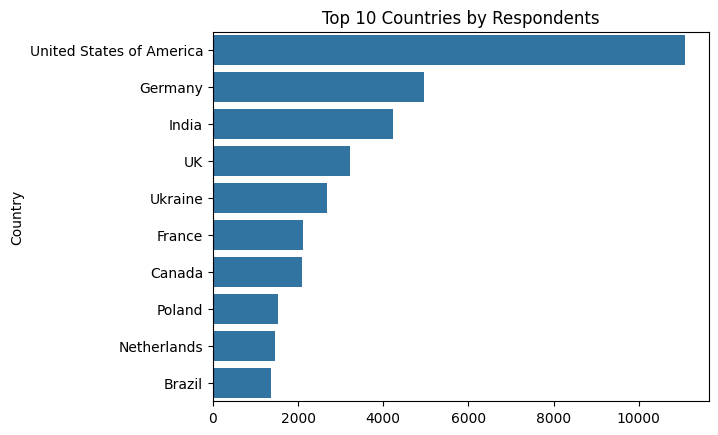

In [91]:
# Top 10 country distribution as bar chart
top_countries = (
    df['Country']
    .value_counts()
    .head(10)
)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Respondents')
plt.show()

This shows us that most respondents are from the **US, India, and Germany**, which is consistent with global developer distribution.

### 2.2 Age Distribution

This section will look a tthe age of the users who filled out the questionnaire

In [92]:
# Count of users, grouped by age
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True,)
age_count = (
    df
    .groupby('Age', observed=True)
    .size()
    .reset_index(name='count')
    .sort_values('Age')
)
print(age_count)

                  Age  count
0  Under 18 years old   2568
1     18-24 years old  14098
2     25-34 years old  23911
3     35-44 years old  14942
4     45-54 years old   6249
5     55-64 years old   2575
6   65 years or older    772
7   Prefer not to say    322


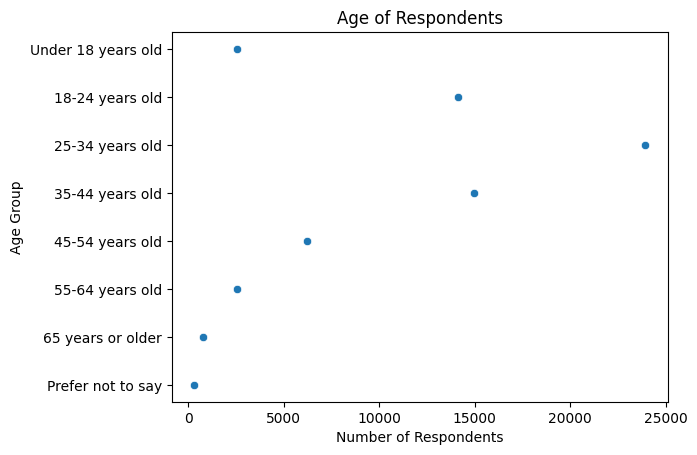

In [93]:
# Plotting on scatter graph
sns.scatterplot(x=age_count['count'], y=age_count['Age'])
plt.title('Age of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Age Group')
plt.show()

The age of the workforce peaks at the top of the bell curve at **25-34 years old**, with the values dipping around that age, reflecting the current age of the developing workforce.

### 2.3 Education Distribution

This section will look at the education achieved by the users who filled out the questionnaire and where they learnt to code to become a developer

In [94]:
# Count of education level
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [95]:
# Separation of learning resource, then a count of each resource
all_learnt = (
    df['LearnCode']
    .dropna()
    .str.split(';')
    )

# Flatten and strip whitespace
flatten_learnt = [learnt.strip() for sublist in all_learnt for learnt in sublist]

# Count occurrences
learnt_count = Counter(flatten_learnt)

# Create DataFrame
learnt_count_df = (
    pd.DataFrame
    .from_dict(learnt_count, orient='index', columns=['Count'])
    .sort_values(by='Count', ascending=False)
    )
learnt_count_df.rename_axis('Learning Resource', inplace=True)

learnt_count_df

,Count
Learning Resource,
"Other online resources (e.g., videos, blogs, forum, online community)",49654
Books / Physical media,30392
Online Courses or Certification,30271
"School (i.e., University, College, etc)",29722
On the job training,27244
Colleague,14258
Coding Bootcamp,6503
Friend or family member,6378
Other (please specify):,3635


From the following results, we can see that Majority of respondents have at least a bachelor’s degree, though self-taught learning through online resources and books remains significant.

*** 

## 3.0 Salary Analysis

### 3.1 Salary comparative to role

In this section, we are going to look at the median salary of professional developers and how they scale depending on their professional role

In [96]:
#Creating a salary dataframe and excluding outlying values
salary_df = df[['SalaryUSD','YearsCodePro','Country','DevType']].dropna()
salary_df = salary_df[salary_df['SalaryUSD'] < 300000]

# Extract the first listed role
salary_df['PrimaryRole'] = salary_df['DevType'].str.split(';').str[0]

# Dropping "Other (please specify):"
salary_df = salary_df[salary_df['PrimaryRole'] != "Other (please specify):"]

# Group and calculate median salary
role_salaries = (
    salary_df
    .groupby('PrimaryRole')['SalaryUSD']
    .median()
    .sort_values(ascending=False)
    .map(lambda x: f"${x:,.2f}")
)

role_salaries

PrimaryRole
Developer Advocate                               $118,154.50
Engineering manager                              $112,312.00
Senior Executive (C-Suite, VP, etc.)             $110,708.50
Engineer, site reliability                        $96,666.00
Cloud infrastructure engineer                     $94,267.00
Developer Experience                              $85,925.00
Blockchain                                        $80,277.50
Product manager                                   $77,332.00
Data engineer                                     $75,184.00
Security professional                             $75,092.00
Hardware Engineer                                 $74,573.50
Scientist                                         $74,394.50
Research & Development role                       $74,174.50
Data scientist or machine learning specialist     $72,499.00
DevOps specialist                                 $71,668.50
Database administrator                            $70,512.00
Developer, e

The results show us that the higher paying jobs are within the management roles, such as **Developer Advocate** and **Senior Executives**, with differentiating engineering roles making up the higher paying roles. In terms of the development roles, it looks as if the hierarchy goes from front end developing, to full stack to then become a back end developer to reach the highest point before moving to management. 

### 3.2 Salary comparative to experience

In this section, we are going to look at the median salary of professional developers and how they scale depending on experience

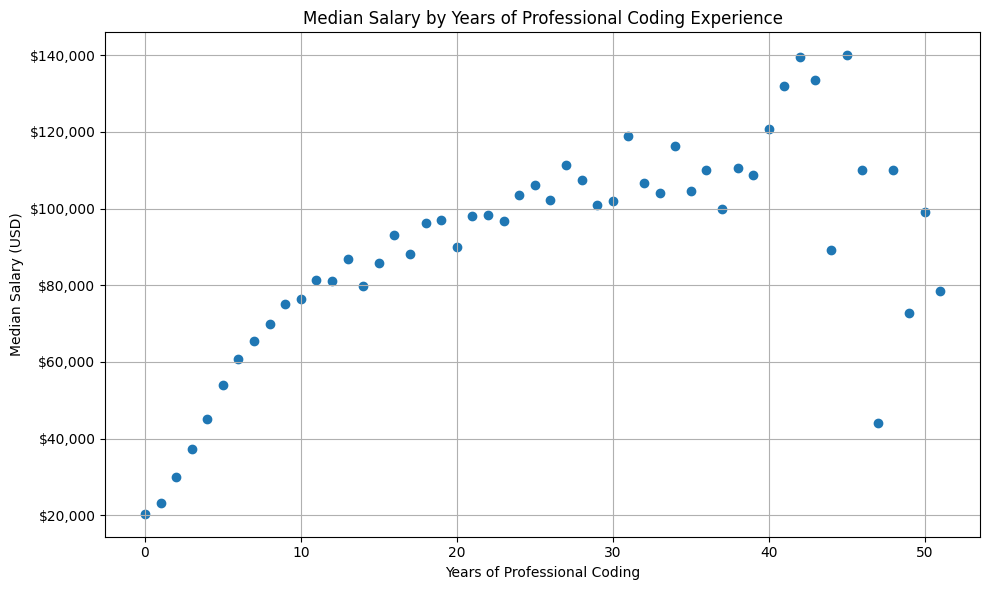

In [97]:
# Median of pay comparative to years coding professionally
years_to_pay = salary_df[['YearsCodePro', 'SalaryUSD']]

years_to_pay_df = (
    years_to_pay
    .groupby('YearsCodePro')['SalaryUSD']
    .median()
    .sort_index(ascending=True)
    )
years_to_pay_df

# --- SCATTER GRAPH ---
plt.figure(figsize=(10, 6))
plt.scatter(years_to_pay_df.index, years_to_pay_df.values)

plt.title('Median Salary by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Median Salary (USD)')
plt.grid(True)

# Formatting y-axis as currency
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


Looking at this scatter graph, we can see that between 0 and 10 years, the nature of the curve in terms of pay takes a natural incline, showing that during these years, the experience each year you gather is crucial for the role and the reflected by a higher salary. After 10 years, the results scatter around, which demonstrates that after these years, you are deemed an expert in your field and the pay is only reflective of the role you do and the company you work for. 

### 3.2 Creating experience groups

Using these results, i will create categories for groups of experience which can be used for later analysis.

In [98]:
# Creating experience groups
def Experience_groups(years):
    if years in [1, 2]:
        return 'Junior'
    elif 3 <= years <= 5:
        return 'Mid-Level'
    elif 6 <= years <= 10:
        return 'Senior'
    elif years >= 11:
        return 'Expert/Leadership'
    elif years == 0:
        return 'Entry Level'
    else:
        return 'NA'
    
df['ExperienceGroups'] = df['YearsCodePro'].apply(Experience_groups)

custom_order = ['Entry Level', 'Junior', 'Mid-Level', 'Senior', 'Expert/Leadership']
df['ExperienceGroups'] = pd.Categorical(df['ExperienceGroups'], categories=custom_order, ordered=True,)

experience_counts = (
    df
    .groupby('ExperienceGroups', observed=True)
    .size()
    .dropna()
    .reset_index(name='count')
    .sort_values('ExperienceGroups')
)

print(experience_counts)

    ExperienceGroups  count
0        Entry Level   2856
1             Junior   6807
2          Mid-Level  10834
3             Senior  12653
4  Expert/Leadership  18460


These 5 groups should perfectly reflect their experience and we can now analyze how their experience comes into play and the differentiation between their answers

***

## 4.0 Platform Analysis

### 4.1 Programming Languages

In this section, we are going to dive into the top programming languages used by the participants of this questionnaire. 

In [99]:
# Percentage of programming languages used by participants
all_language = (
    df['LanguageHaveWorkedWith']
    .dropna()
    .str.split(';')
    )

# Flatten and strip whitespace
flatten_lang = [language.strip() for sublist in all_language for language in sublist]

# Count occurrences
language_count = Counter(flatten_lang)

# Create DataFrame and calculate percentages
language_count_df = (
    pd.DataFrame
    .from_dict(language_count, orient='index', columns=['Count'])
    .sort_values(by='Count', ascending=False)
    )
language_count_df['Percentage'] = ((language_count_df['Count'] / language_count_df['Count'].sum()) * 100).map("{:.2f}%".format)

language_count_df.rename_axis('Programming Language', inplace=True)

language_count_df

,Count,Percentage
Programming Language,,
JavaScript,37492,11.64%
HTML/CSS,31816,9.87%
Python,30719,9.53%
SQL,30682,9.52%
TypeScript,23150,7.18%
Bash/Shell (all shells),20412,6.33%
Java,18239,5.66%
C#,16318,5.06%
C++,13827,4.29%


The results show us that **Python and JavaScript** continue to dominate the developer landscape, reinforcing their role as “must-know” skills across industries. Emerging languages (like **Go** and **Rust**) are gaining traction, though they still trail behind the top three.
- For employers: this trend suggests training investment in Python + SQL can address a large portion of developer skill needs.  
- For developers: focusing on Python/JavaScript + SQL remains a strong career strategy in 2024

## 3.2 Database Platforms

Now, we will analyze the databases which are used by the professional developers and their frequency.

In [100]:
# Percentage of databases used by participants
all_databases =(
    df['DatabaseHaveWorkedWith']
    .dropna()
    .str.split(';')
    )

# Flatten and strip whitespace
flatten_db = [database.strip() for sublist in all_databases for database in sublist]

# Count occurrences
database_count = Counter(flatten_db)

# Create DataFrame and calculate percentages
database_count_df = (pd.DataFrame
                    .from_dict(database_count, orient='index', columns=['Count'])
                    .sort_values(by='Count', ascending=False)
                    )
database_count_df['Percentage'] = ((database_count_df['Count'] / database_count_df['Count'].sum()) * 100).map("{:.2f}%".format)

database_count_df.rename_axis('Database', inplace=True)

database_count_df

,Count,Percentage
Database,,
PostgreSQL,25536,16.55%
MySQL,21099,13.68%
SQLite,17365,11.26%
Microsoft SQL Server,13275,8.61%
MongoDB,13007,8.43%
Redis,10463,6.78%
MariaDB,8991,5.83%
Elasticsearch,6533,4.24%
Oracle,5273,3.42%


Looking at these stats, **SQL** and other variations of **SQL** make up 50.1% of the total results, cementing its place in the database language to learn within the development industry. **Mongo** and **Redis** are a good backup database language to learn, but trail far behind the requirements for **SQL** in a required skill.

### 3.3 Platforms & Collab Tools

We will now dive into the operating platforms and collaboration tools used by the developers within this questionnaire.

In [101]:
# Percentage of platforms used by participants
all_platforms = (
    df['PlatformHaveWorkedWith']
    .dropna()
    .str.split(';')
    )

# Flatten and strip whitespace
flatten_plat = [platform.strip() for sublist in all_platforms for platform in sublist]

# Count occurrences
platform_count = Counter(flatten_plat)

# Create DataFrame and calculate percentages
platform_count_df = (
    pd.DataFrame
    .from_dict(platform_count, orient='index', columns=['Count'])
    .sort_values(by='Count', ascending=False)
    )
platform_count_df['Percentage'] = ((platform_count_df['Count'] / platform_count_df['Count'].sum()) * 100).map("{:.2f}%".format)

platform_count_df.rename_axis('Platforms', inplace=True)

platform_count_df

,Count,Percentage
Platforms,,
Amazon Web Services (AWS),22191,22.34%
Microsoft Azure,12850,12.93%
Google Cloud,11605,11.68%
Cloudflare,6974,7.02%
Firebase,6443,6.49%
Vercel,5491,5.53%
Digital Ocean,5409,5.44%
Heroku,3798,3.82%
Netlify,3238,3.26%


In [102]:
# Percentage of collaboration tools used by participants
all_tools = (
    df['NEWCollabToolsHaveWorkedWith']
    .dropna()
    .str.split(';')
    )

# Flatten and strip whitespace
flatten_tools = [tools.strip() for sublist in all_tools for tools in sublist]

# Count occurrences
tools_count = Counter(flatten_tools)

# Create DataFrame and calculate percentages
tools_count_df = (
    pd.DataFrame
    .from_dict(tools_count, orient='index', columns=['Count'])
    .sort_values(by='Count', ascending=False)
    )
tools_count_df['Percentage'] = ((tools_count_df['Count'] / tools_count_df['Count'].sum()) * 100).map("{:.2f}%".format)

tools_count_df.rename_axis('Collaboration tools', inplace=True)

tools_count_df

,Count,Percentage
Collaboration tools,,
Visual Studio Code,42751,21.79%
Visual Studio,17021,8.67%
IntelliJ IDEA,15555,7.93%
Notepad++,13874,7.07%
Vim,12523,6.38%
Android Studio,9379,4.78%
PyCharm,8781,4.47%
Jupyter Notebook/JupyterLab,7432,3.79%
Neovim,7239,3.69%


Looking at the platforms, **AWS, Microsoft Azure & Google Cloud** dominate as the big 3, taking the highest percentage and the most popular platforms. as for the Collaboration tools, Microsoft dominate with VS and VS code taking over 30% of the share. While over 9% of the participants work wih `Python`, only 3% are using python with `Jupyter Notebooks`, which would suggest the divide between the users who use Python for analytics and the ones who use it to code being 6%.

### 3.4 Top Values Based on Experience Groups

In the following section, we will be looking at getting the top values for each `Programming Language, Database & Platform` used by each `Experience Group`. We will also have a toggle-able N value so we can grab any amount of top values. For this report, we will look at the top 3

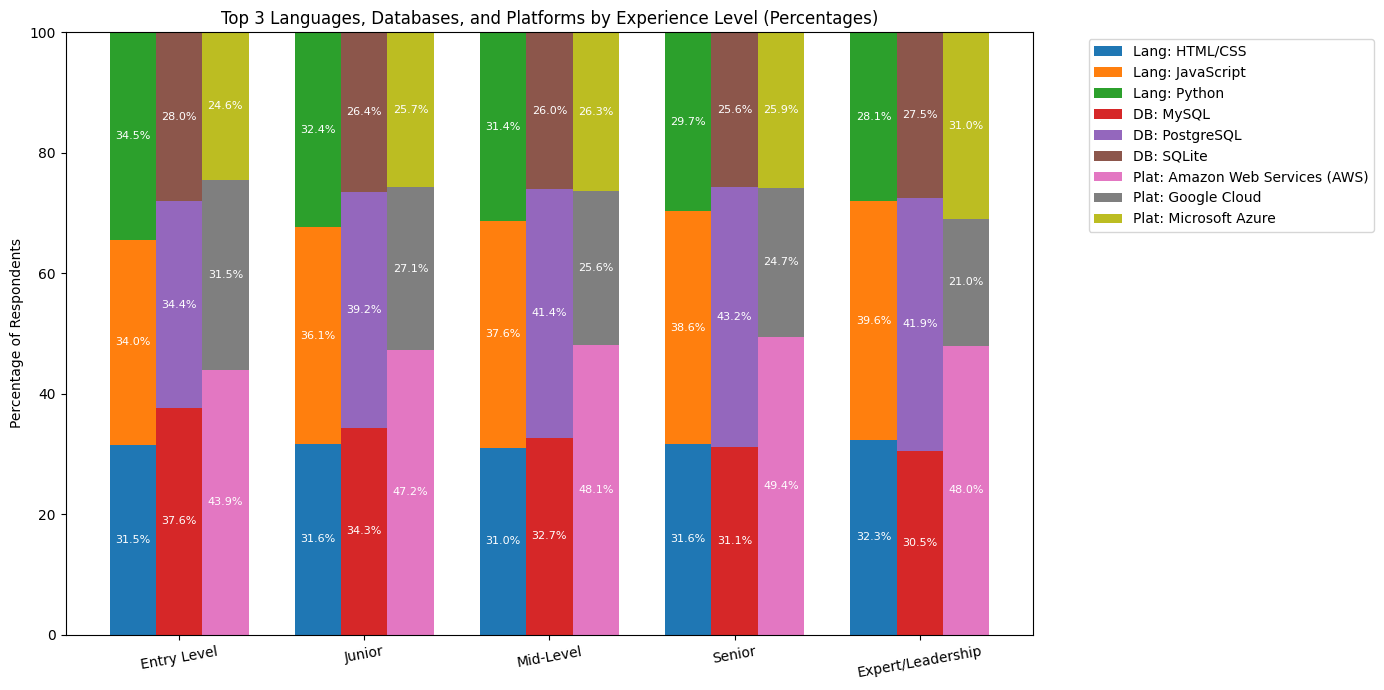

In [109]:
#Toggle-able n variable
n = 3

# Helper to get top N categories overall
def get_top_n(df, column, n=n):
    all_items = (
        df[column]
        .dropna()
        .str.split(';')
        .explode()
        .str.strip()
    )
    return all_items.value_counts().head(n).index.tolist()

# Function to build grouped percentages by ExperienceGroups
def build_grouped_perc(df, column, top_items):
    exploded = (
        df[['ExperienceGroups', column]]
        .dropna()
        .assign(**{column: df[column].str.split(';')})
        .explode(column)
        .dropna()
    )
    exploded[column] = exploded[column].str.strip()
    exploded = exploded[exploded[column].isin(top_items)]
    
    counts = (
        exploded
        .groupby(['ExperienceGroups', column], observed=True)
        .size()
        .reset_index(name='count')
    )
    pivot = counts.pivot(index='ExperienceGroups', columns=column, values='count').fillna(0)
    
    # Normalize to percentages (row-wise)
    pivot = pivot.div(pivot.sum(axis=1), axis=0) * 100
    return pivot

# Top 3 categories
top_langs = get_top_n(df, 'LanguageHaveWorkedWith', n=n)
top_dbs = get_top_n(df, 'DatabaseHaveWorkedWith', n=n)
top_plats = get_top_n(df, 'PlatformHaveWorkedWith', n=n)

# Build pivot tables
lang_pivot = build_grouped_perc(df, 'LanguageHaveWorkedWith', top_langs)
db_pivot = build_grouped_perc(df, 'DatabaseHaveWorkedWith', top_dbs)
plat_pivot = build_grouped_perc(df, 'PlatformHaveWorkedWith', top_plats)

# Ensure same ExperienceGroups order
lang_pivot = lang_pivot.reindex(custom_order).fillna(0)
db_pivot = db_pivot.reindex(custom_order).fillna(0)
plat_pivot = plat_pivot.reindex(custom_order).fillna(0)

# --- STACKED BAR CHART ---
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(custom_order))  # positions for each ExperienceGroup
width = 0.25  # width of each bar group

# Plot function with annotations
def plot_stacks(pivot, offset, prefix, color_map=None):
    bottom = np.zeros(len(custom_order))
    for col in pivot.columns:
        bars = ax.bar(x + offset, pivot[col], width, bottom=bottom, label=f"{prefix}: {col}")
        # Add percentage labels inside bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height > 5:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bottom[i] + height / 2,
                    f"{height:.1f}%",
                    ha="center", va="center", fontsize=8, color="white"
                )
        bottom += pivot[col].values

# Plot 3 grouped stacked bars
plot_stacks(lang_pivot, -width, "Lang")
plot_stacks(db_pivot, 0, "DB")
plot_stacks(plat_pivot, +width, "Plat")

# Labels & formatting
ax.set_xticks(x)
ax.set_xticklabels(custom_order, rotation=10)
ax.set_ylabel("Percentage of Respondents")
ax.set_title(f"Top {n} Languages, Databases, and Platforms by Experience Level (Percentages)")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Looking at the Top 3 for each `Programming Language, Database & Platform`, we can see make the following observations:

- Entry level tend to use Python more than experts, but this number dips and leans more towards Javascript. This is probably because Python is recognized as being an easier language to understand and get into the industry with, then using their experience to deviate towards a more complex language in the future.
- Dips in MySQL shift towards PostgreSQL with a significant change in percentage, which SQLite maintains a steady percentage of the share
- Google cloud looks to be the Platform of choice for entry level roles which could signify a change in direction in the required platform to get a job in the industry, as the percentage of google cloud share oer experience drops significantly.

***

## 4.0 Industry Implications

In this section, we will cover the two main industry implications which has occurred over the last couple of years, COVID's impact on remote working and the rise of AI within the workforce

### 4.1 Remote working

Firstly, to brake down this result, we will group results based on the result they gave to the `RemoteWork` question, then group them by the score they gave on the `JobSat` question to visualize the correlation. 

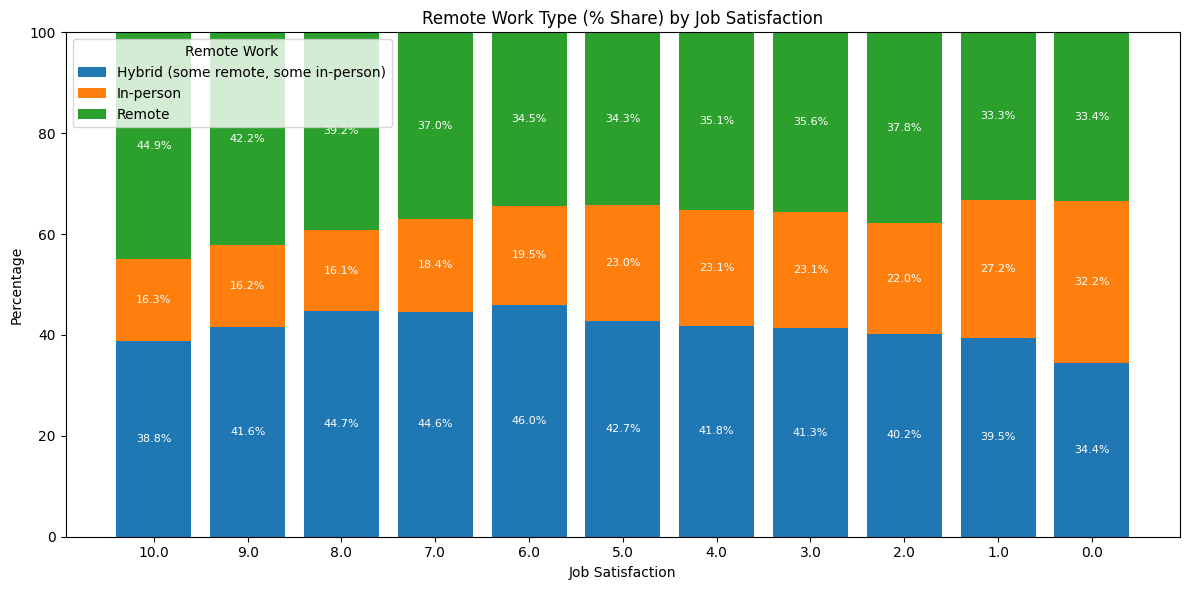

In [130]:
# Remote work to job satisfaction coalition 
remote_to_js_df = (
    df[['JobSat', 'RemoteWork']]
    .dropna()
    .groupby(['JobSat', 'RemoteWork'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['JobSat', 'count'])
)

# Pivot counts
pivot_df = remote_to_js_df.pivot(
    index='JobSat',
    columns='RemoteWork',
    values='count'
).fillna(0)

# Converting to percentages
pivot_perc = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# --- STACKED BAR CHART ---
fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(len(pivot_perc))
for col in pivot_perc.columns:
    bars = ax.bar(pivot_perc.index, pivot_perc[col], bottom=bottom, label=col)

    # Annotate percentages inside bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 5:  # only annotate if >5% for readability
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bottom[i] + height / 2,
                f"{height:.1f}%",
                ha="center", va="center", fontsize=8, color="white"
            )

    bottom += pivot_perc[col].values

# Labels & formatting
ax.set_title('Remote Work Type (% Share) by Job Satisfaction')
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)
ax.legend(title='Remote Work')

# Show all JobSat values on the x-axis
ax.set_xticks(range(len(pivot_perc.index)))
ax.set_xticklabels(pivot_perc.index, rotation=0)

# Keep JobSat = 10.0 on the left, 0.0 on the right
ax.invert_xaxis()

plt.tight_layout()
plt.show()

Looking at the result, In-person holds only a 16% share of the highest score possible, with a consistent trend of In-person growing in percentage as the score goes down to the point where it has around an equal share of the `JobScore` with a 0 score.

Although there are other concerning factors, this shows a shift in the work patterns with more people being happier with their job when they have a Hybrid role, with an even higher score when the person is fully remote. 

### 4.2 AI in the Workforce

The next section, we will look at the AI in the workforce and its influence in the roles, starting with the AI platform most used by developers.

In [131]:
# Percentage of AIModel used by participants
all_models = (
    df['AISearchDevHaveWorkedWith']
    .dropna()
    .str.split(';')
    )

# Flatten and strip whitespace
flattened = [model.strip() for sublist in all_models for model in sublist]

# Count occurrences
model_counts = Counter(flattened)

# Create DataFrame and calculate percentages
model_counts_df = (
    pd.DataFrame
    .from_dict(model_counts, orient='index', columns=['Count'])
    .sort_values(by='Count', ascending=False)
    )
model_counts_df['Percentage'] = ((model_counts_df['Count'] / model_counts_df['Count'].sum()) * 100).map("{:.2f}%".format)

model_counts_df.rename_axis('AI Model', inplace=True)

model_counts_df

,Count,Percentage
AI Model,,
ChatGPT,37923,36.51%
GitHub Copilot,19032,18.33%
Google Gemini,11056,10.65%
Bing AI,7305,7.03%
Visual Studio Intellicode,6296,6.06%
Claude,3760,3.62%
Codeium,2809,2.70%
WolframAlpha,2567,2.47%
Perplexity AI,2462,2.37%


This shows that ChatGPT holds a high percentage of the share, with a massive 36% of all developers using the platform, with GitHub and Gemini both above 10%. While in todays market, claude is known to be a great AI resource for developers, it held only a 3.62 % share in 2024, showing its growth over the year.

Next, we will look at the perceived threat that AI has on the roles based on the groups of experience, to see the correlation.

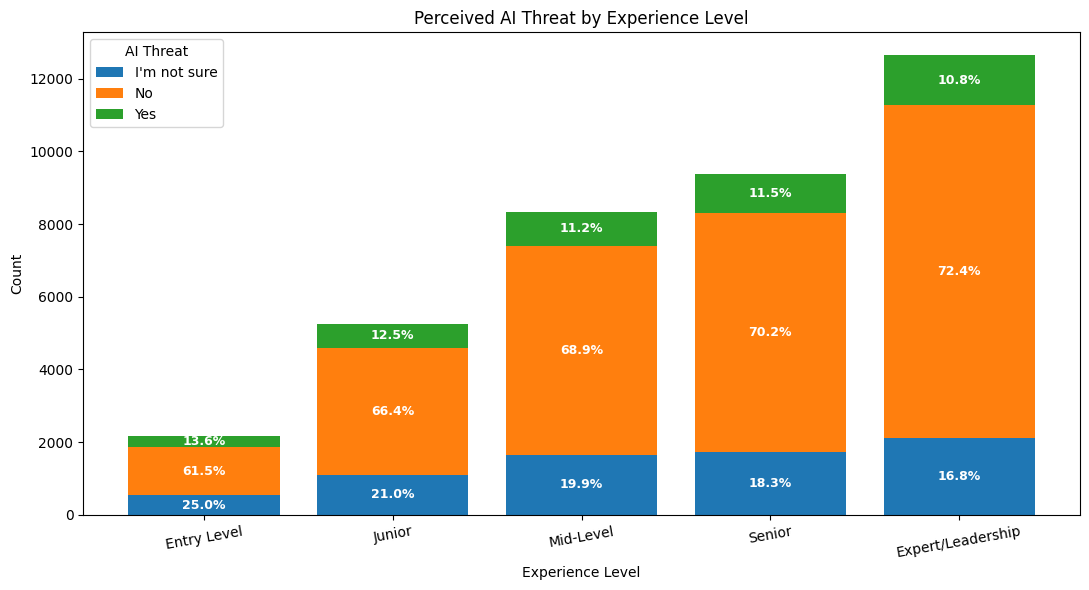

In [132]:
# Perceived threat of AI to job based on experience level
exp_to_aithreat = (
    df[['ExperienceGroups', 'AIThreat']]
    .dropna()
    .groupby(['ExperienceGroups', 'AIThreat'], observed=True)
    .size()
    .reset_index(name='count')
)

# Add total votes per experience group
exp_to_aithreat['total_votes'] = exp_to_aithreat.groupby(('ExperienceGroups'), observed=True)['count'].transform('sum')

# Add percentage share and ensures percentage is numeric
exp_to_aithreat['percentage'] = (exp_to_aithreat['count'] / exp_to_aithreat['total_votes'] * 100)
exp_to_aithreat['percentage'] = pd.to_numeric(exp_to_aithreat['percentage'], errors='coerce')

# Pivot for plotting
pivot_df = exp_to_aithreat.pivot(index='ExperienceGroups', columns='AIThreat', values='count').fillna(0)
pivot_perc = exp_to_aithreat.pivot(index='ExperienceGroups', columns='AIThreat', values='percentage').fillna(0)

# --- STACKED BAR CHART ---
plt.figure(figsize=(11, 6))
bottom = [0] * len(pivot_df)

for column in pivot_df.columns:
    # Plot counts
    plt.bar(pivot_df.index, pivot_df[column], bottom=bottom, label=str(column))

    # Add percentage labels
    for i, perc in enumerate(pivot_perc[column]):
        if perc > 0:
            plt.text(
                i,
                bottom[i] + pivot_df[column].iloc[i] / 2,
                f"{perc:.1f}%",
                ha='center', va='center',
                color='white', fontsize=9, fontweight='bold'
            )

    # Update bottom for stacking
    bottom = [bottom[i] + pivot_df[column].iloc[i] for i in range(len(bottom))]

# Labels & formatting
plt.title("Perceived AI Threat by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=10)
plt.legend(title="AI Threat")
plt.tight_layout()
plt.show()

We can see a direct collation with the level of experience the developer has, the increased confidence that AI poses no threat, with `No` increasing by ~11%, with `Yes` shrinking by ~3%. However, we see a 16 - 25% variant with developers being unsure whether their job would be at risk. We can only ottain this to the speed in which the AI technology is being developed and uncertainty on its capabilities within the future.

***

# Conclusion

This analysis of the 2024 Stack Overflow Developer Survey highlights several important trends:

- **Python, JavaScript, and SQL** remain the core developer languages.  
- **Cloud adoption** (AWS, Azure, GCP) is nearly universal.  
- **Salaries** vary significantly by role and experience, with senior/management and engineering roles ranking the highest.  
- **Continuous learning** is central to career growth, often outside traditional education.
- **Hybrid & Remote working** are the most favoured working conditions, outputting the highest work satisfaction output.
- **AI** has become a great tool for aiding developing or manual time consuming processes, however are not perceived as a threat to the job.